Name : Nikhil Dashrath Gopale

RollNo : 30

Course : Msc Data Science and big data Analytics

project : TCS iON RIO-125: Forecasting System - Project Demand of Products at a Retail Outlet Based on Historical Data 

# What is Forcasting?

Forecasting is the process of making predictions based on past and present data. 
Later these can be compared against what happens.


Forcasting using ARIMA model

Objective:  
The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions


# Step 1 : Import Library And read Data

In [55]:
# impoer Modules

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df=pd.read_csv('https://raw.githubusercontent.com/NikhilGopale3008/Datasets/main/Monthly-Sales-file.csv') # Read CSV file 

In [57]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [58]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [59]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [60]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [61]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [62]:
df.drop(105,axis=0,inplace=True)

In [63]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [64]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [65]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [66]:
df.set_index('Month',inplace=True)

In [67]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [68]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

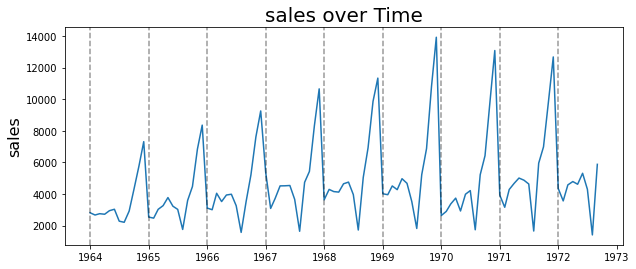

In [69]:


plt.figure(figsize=(10,4))
plt.plot(df["Sales"])
plt.title('sales over Time', fontsize=20)
plt.ylabel('sales', fontsize=16)
for year in range(1964,1973):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.4)

In [70]:
df.isnull().sum()

Sales    0
dtype: int64

In [71]:
# Calculeted of percently growth or 'rentability in business series' 
df["growth_rate"] = ((df.Sales/df.Sales.shift()) - 1) * 100
df.head()

,Sales,growth_rate
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-5.079929
1964-03-01,2755.0,3.106287
1964-04-01,2721.0,-1.234120
1964-05-01,2946.0,8.269019


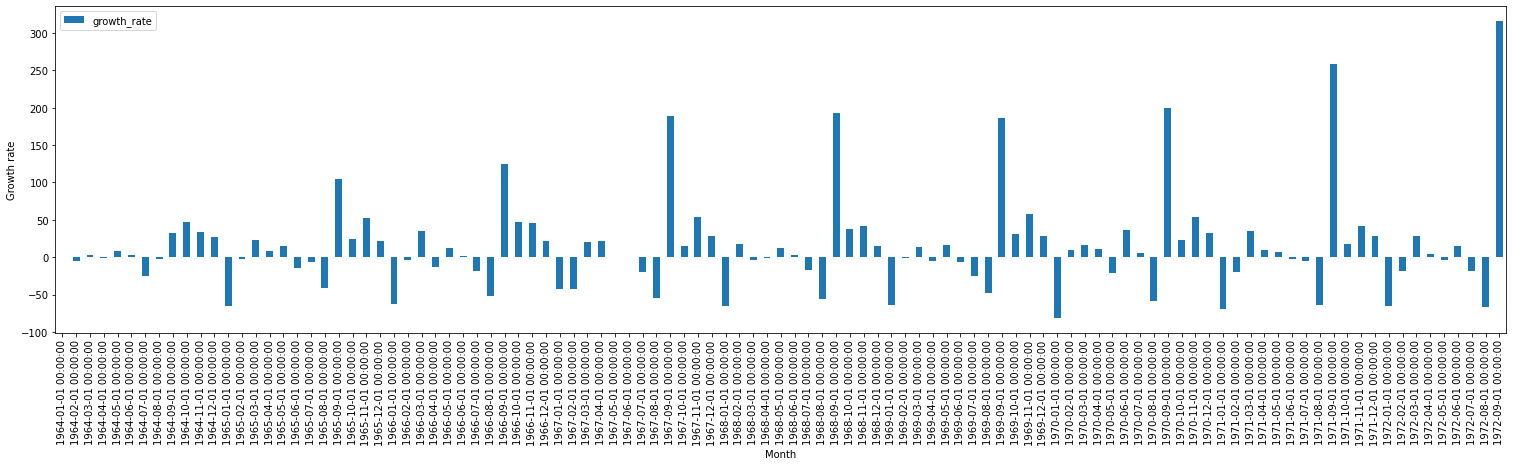

In [72]:
#growpt rate by month
df.groupby("Month").agg({"growth_rate":"sum"}).plot(kind="bar", figsize=(26,6), 
                                                            xlabel="Month", ylabel="Growth rate");

Rolling Statistics Test:
 hepls to visulaise data better whether data is stationary or non stationary via measures like:
-rollling mean
-rolling standard deviation 

In [73]:

rolling_mean=df.rolling(window=12).mean()
rolling_std_dev=df.rolling(window=12).std()

print(rolling_mean)
print("------------------------------")
print(rolling_std_dev)

                  Sales  growth_rate
Month                               
1964-01-01          NaN          NaN
1964-02-01          NaN          NaN
1964-03-01          NaN          NaN
1964-04-01          NaN          NaN
1964-05-01          NaN          NaN
...                 ...          ...
1972-05-01  5709.500000    18.305317
1972-06-01  5746.000000    19.783877
1972-07-01  5718.083333    18.605189
1972-08-01  5697.583333    18.360808
1972-09-01  5691.416667    23.128600

[105 rows x 2 columns]
------------------------------
                  Sales  growth_rate
Month                               
1964-01-01          NaN          NaN
1964-02-01          NaN          NaN
1964-03-01          NaN          NaN
1964-04-01          NaN          NaN
1964-05-01          NaN          NaN
...                 ...          ...
1972-05-01  2943.699327    82.765813
1972-06-01  2935.100773    82.514267
1972-07-01  2948.213094    82.999216
1972-08-01  2979.690449    83.269042
1972-09-01  2979.194

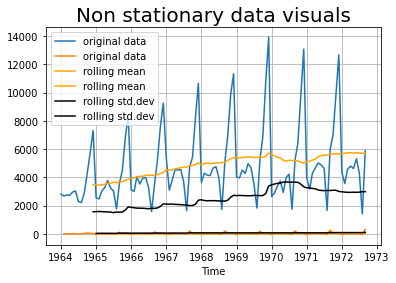

In [74]:
# visualsing data in terms of rolling statistical measures

plt.plot(df,label="original data")
plt.plot(rolling_mean,label="rolling mean",color="orange")
plt.plot(rolling_std_dev,label="rolling std.dev",color="black")
plt.title("Non stationary data visuals",fontsize=20)
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.show()

#Augumented Dickey Fuller Test:

used to check stationarity of data in a more meaningful,statistical and significant format.

In [75]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [76]:
test_result=adfuller(df['Sales'])

In [77]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [78]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276188
p-value : 0.363915771660247
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# As per the test results,

it's quite clear that data we are provided with isn't at all statioanry.

Now,we pass data through further processing to finally get transformed data(stationary).

attempt in various ways(seasonal differencing ,by taking log to reduce the value scale. )

can be made to transform non stationary data to stationary format

## Differencing

In [79]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [80]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [81]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [82]:
df.head(14)

,Sales,growth_rate,Sales First Difference,Seasonal First Difference
Month,,,,
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,-5.079929,-143.0,NaN
1964-03-01,2755.0,3.106287,83.0,NaN
1964-04-01,2721.0,-1.234120,-34.0,NaN
1964-05-01,2946.0,8.269019,225.0,NaN
1964-06-01,3036.0,3.054990,90.0,NaN
1964-07-01,2282.0,-24.835310,-754.0,NaN
1964-08-01,2212.0,-3.067485,-70.0,NaN
1964-09-01,2922.0,32.097649,710.0,NaN


In [83]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


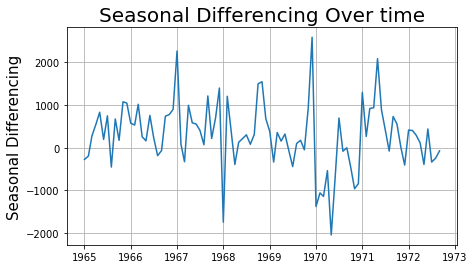

In [84]:

# visualsing the newly transformed (stationary data)

plt.figure(figsize=(7,4))
plt.plot(df["Seasonal First Difference"])
plt.title("Seasonal Differencing Over time",fontsize=20)
plt.ylabel("Seasonal Differencing",fontsize=15)
plt.grid(True)
# plt.plot(df["seasonal differencing"])

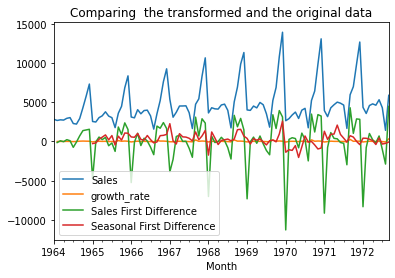

In [85]:
df.plot(title="Comparing  the transformed and the original data")

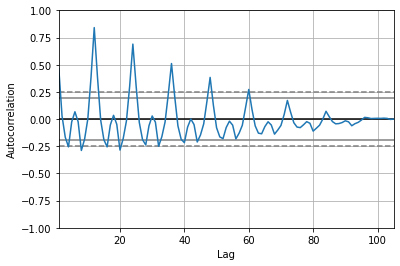

In [86]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [87]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [88]:
import statsmodels.api as sm

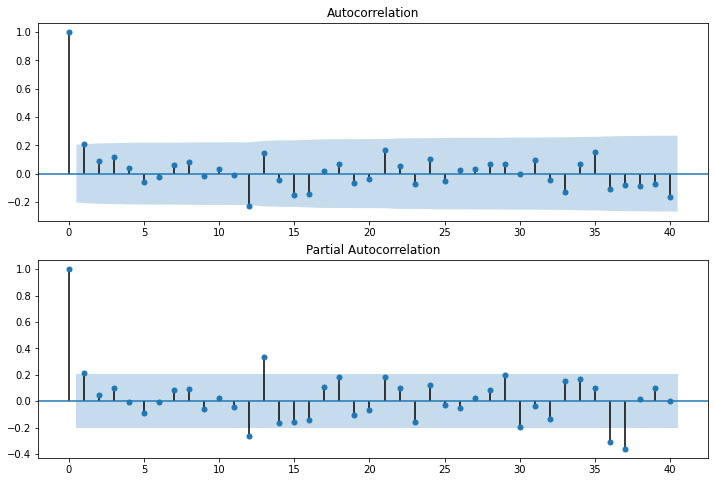

In [89]:
# plot autocorrelation and partialautocorrelation plots to get useful parameters to fit in the model

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

ARIMA(p,d,q)

pacf plot : order of "AR model" i.e "p"

acf plot : order of "MV Model" i.e "q"

integration : order of differencing i.e "d"

In [90]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

 ARIMA   :   Non-seasonal Autoregressive Integrated Moving Averages  -->(p,d,q)

 SARIMA  :   Seasonal ARIMA
 
 SARIMAX :   Seasonal ARIMA with exogenous variables

#ARIMA


In [91]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

In [92]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 09 Nov 2022   AIC                           1910.251
Time:                        07:44:52   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7854     12.405      1.837      0.066      -1.528      47.099
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

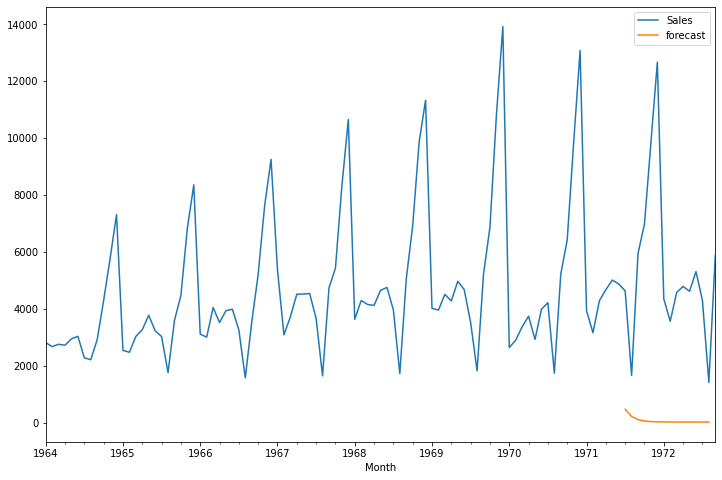

In [93]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [94]:
import statsmodels.api as sm

In [95]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


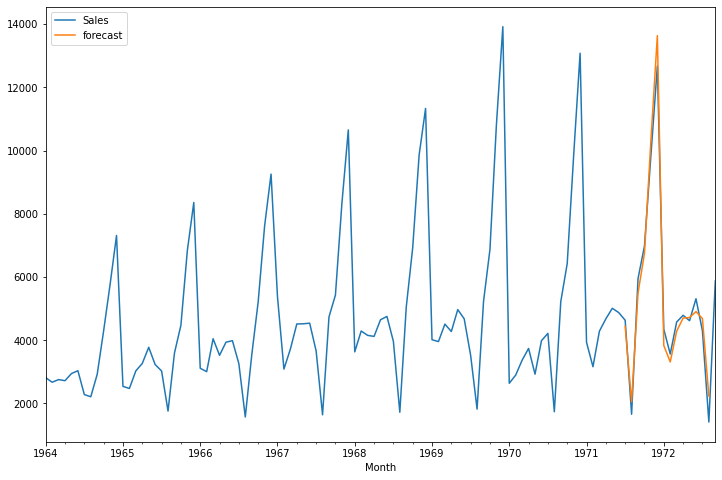

In [96]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [97]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [98]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [99]:
future_datest_df.tail()

,Sales,growth_rate,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [100]:
future_datest_df.head()

,Sales,growth_rate,Sales First Difference,Seasonal First Difference,forecast
1972-10-01,NaN,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN,NaN


In [101]:
future_df=pd.concat([df,future_datest_df])

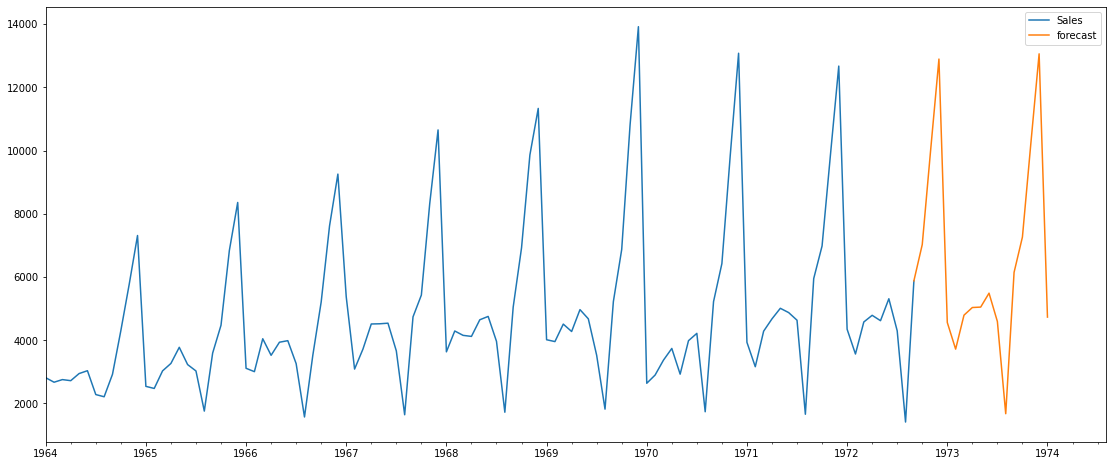

In [102]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(19, 8)) 

In [103]:
# Forecast for the next 3 years

model_=sm.tsa.statespace.SARIMAX(df["Sales"],order=(2,0,2),seasonal_order =(2, 0, 2, 12),trend='n', enforce_stationarity=False)
model_=model_.fit(disp=False)

forecast = model_.predict(start = len(df), 
                          end = (len(df)-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


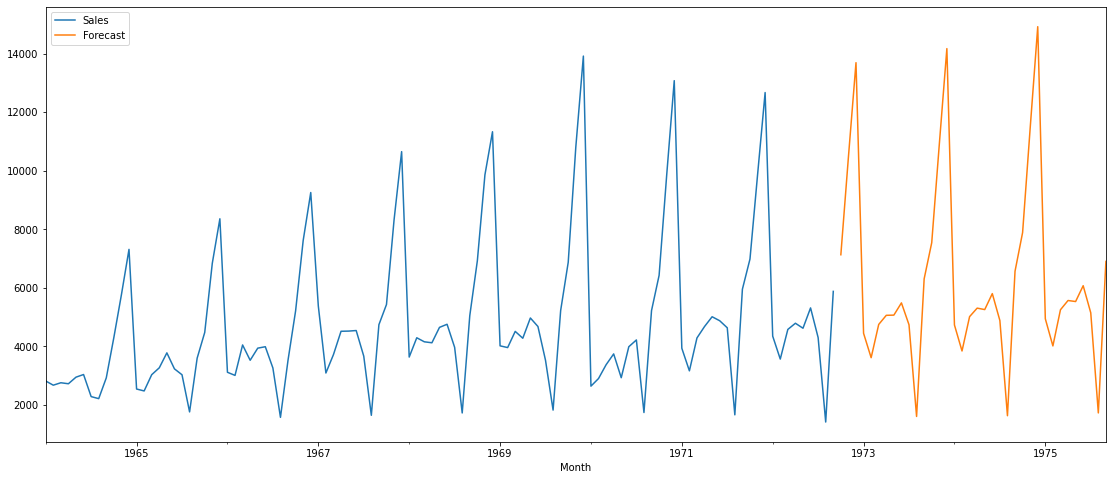

In [104]:
df["Sales"].plot(legend=True)
forecast.plot(legend=True,figsize=(19, 8))   